# TELECOM CUSTOMER CHURN

In [36]:
#importing required libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

In [2]:
#loading our data
df=pd.read_csv('C:/Users/ankush.parkhad/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#checking no. of rows and columns
df.shape

(7043, 21)

Our dataset has 7043 rows and 21 columns

In [4]:
#checking values in first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#checking values in bottom 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
#checking values in any random 3 rows
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6338,2081-KJSQF,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,20.25,No
2377,9308-ANMVE,Male,0,No,Yes,47,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,55.30,2654.05,No
2206,3207-OYBWH,Male,1,Yes,No,57,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.25,5427.05,Yes


In [7]:
#checking null values in our dataframe
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Our dataset has 0 null values

In [8]:
#getting a summary of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Our dataset has zero null values and datatypes are object, float and integers

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Exploration

<AxesSubplot:xlabel='Churn', ylabel='count'>

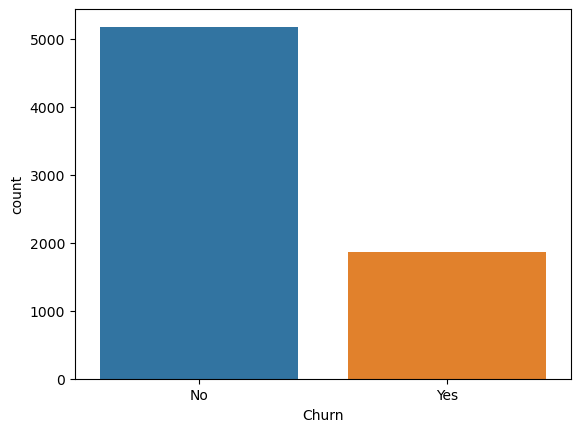

In [10]:
sns.countplot(x='Churn',data=df)

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

OBSERVATION: Out of the complete dataset the ratio of Churner:Non-Churners is around 5:2

<AxesSubplot:xlabel='gender', ylabel='count'>

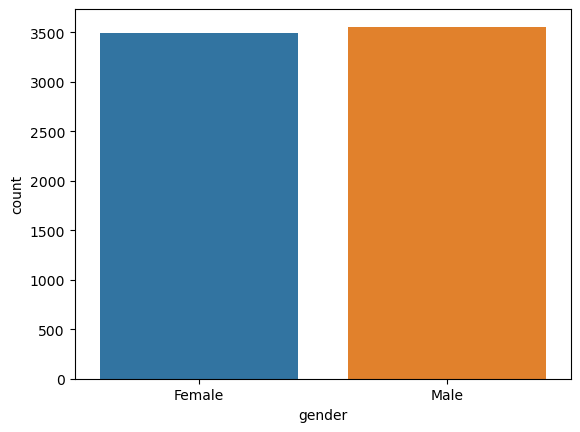

In [12]:
sns.countplot(x='gender',data=df)

OBSERVATION: Both Male and Female has almost same ratio. The number of Males is slightly higher

<AxesSubplot:xlabel='gender', ylabel='count'>

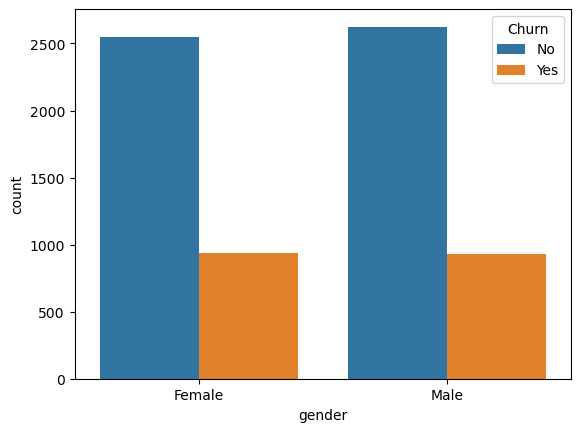

In [13]:
sns.countplot(x='gender',hue='Churn',data=df)

OBSERVATION: Both male and female has almost same ratio of Churn(Yes:No)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

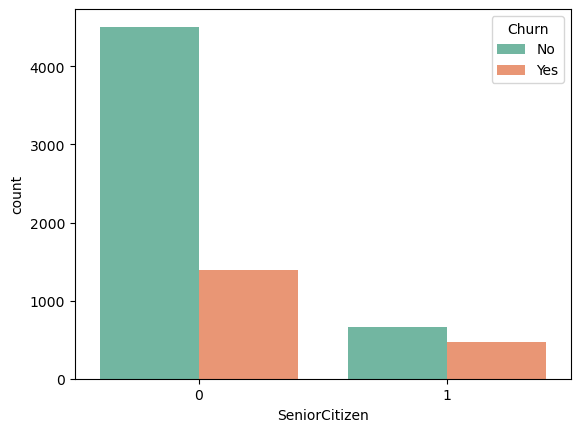

In [14]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df,palette='Set2') 

OBSERVATION: Amongst senior citizens the rate of churn is higher as compared to those who are not senior citizen.

<AxesSubplot:xlabel='Partner', ylabel='count'>

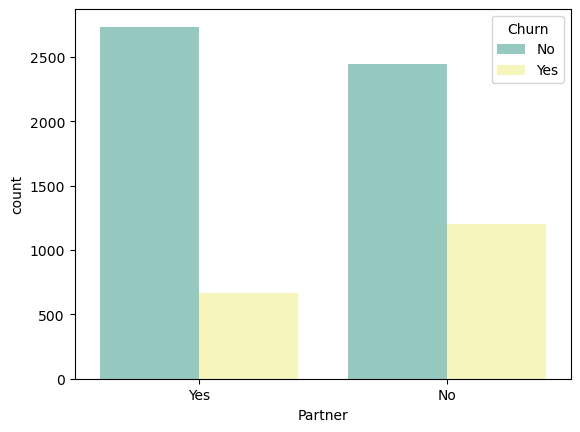

In [15]:
sns.countplot(x='Partner',hue='Churn',data=df,palette='Set3')

OBSERVATION: The rate of Churn is high among those people who are single as compared to those who are married, this might be because married people have their family around them and they have to fulfill their basic needs.

In [16]:
columns=df.columns[0:-1]
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [17]:
#checking how many unique values do 'PaymentMethod' column have so that we can plot it on graph
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

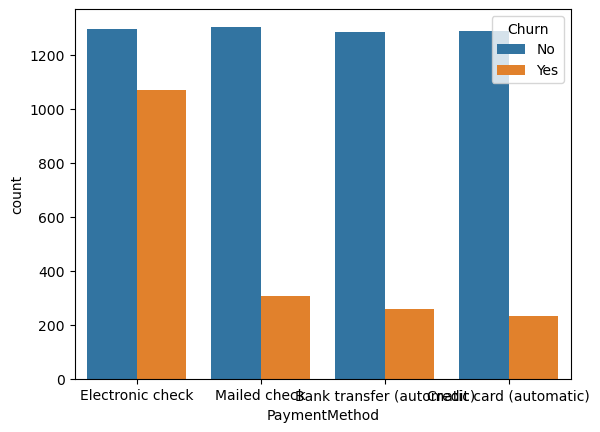

In [18]:
sns.countplot(x='PaymentMethod',hue='Churn',data=df)

As we can see 'PaymentMethod'column have variable names in complex way, so lets simplify it first

In [19]:
Payment_method_column={'Bank transfer (automatic)':'Bank Transfer','Credit card (automatic)':'Credit card'}
df['PaymentMethod'].replace(Payment_method_column, inplace=True)

In [20]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank Transfer', 'Credit card'],
      dtype=object)

Column variables name has been changed

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

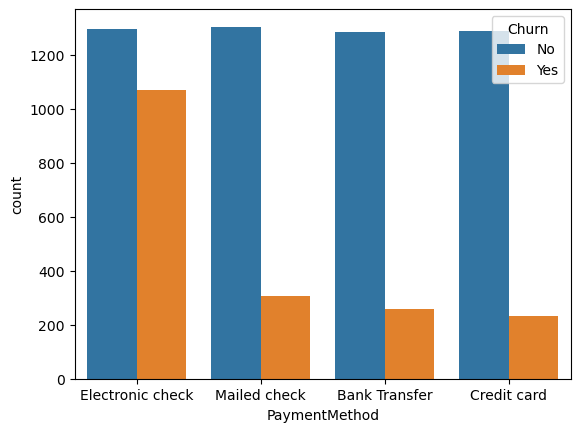

In [21]:
sns.countplot(x='PaymentMethod',hue='Churn',data=df)

OBSERVATION: The Churn rate is high among those who pay by Electronic check while it is lowest among those who pay with Credit card

<AxesSubplot:xlabel='Contract', ylabel='count'>

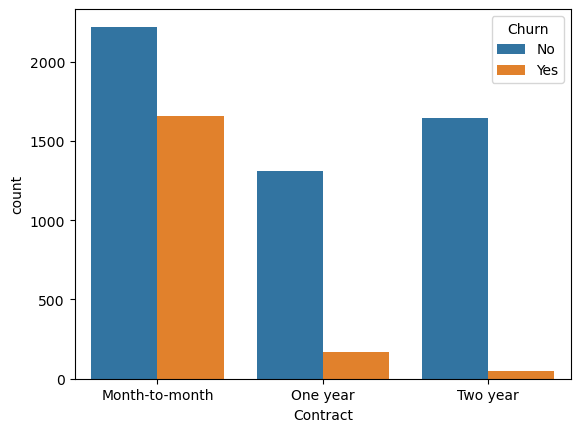

In [22]:
sns.countplot(x='Contract',hue='Churn',data=df)

OBSERVATION: Churn rate is much higher in people whose contract duration is Month to month when compared to others

<AxesSubplot:xlabel='InternetService', ylabel='count'>

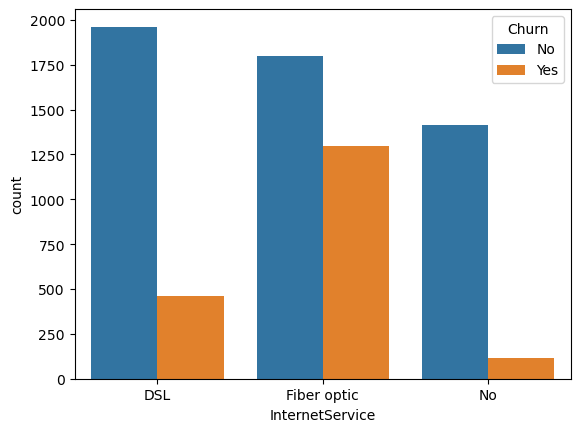

In [23]:
sns.countplot(x='InternetService',hue='Churn',data=df)

OBSERVATION: Churn rate is much higher among those people who use Fiber optic as their Internet service as compared to others

### Feature Engineering

#### As column 'CustomerID' is of no use, lets remove it

In [24]:
df_new=df.drop(['customerID'],axis=1)

In [25]:
df=df_new
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


customerID column has been removed

### As some columns of our dataset has categorical values, lets use Label Encoder to convert in numerical/Binary vlaues

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [27]:
encode_columns=['gender','Partner','Dependents','Churn','PhoneService','PaperlessBilling','InternetService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV','Contract','PaymentMethod']
df[encode_columns] = df[encode_columns].apply(LabelEncoder().fit_transform)  

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1ab9d62e910>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab9d62ed90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ab9d62e640>],
 'medians': [<matplotlib.lines.Line2D at 0x1ab9d641370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ab9d641670>],
 'means': []}

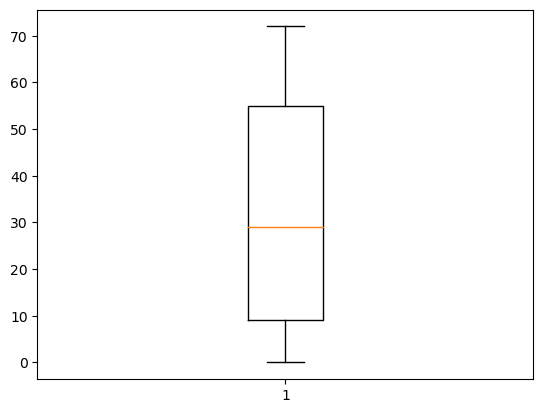

In [29]:
plt.boxplot(df.tenure)

OBSERVATIONS: No Outliers are present in our data

In [41]:
df_new = df.copy()
df_new["MonthlyCharges"] = df_new["MonthlyCharges"].astype("int64")
df_new.head()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   int32 
 1   SeniorCitizen     7043 non-null   int64 
 2   Partner           7043 non-null   int32 
 3   Dependents        7043 non-null   int32 
 4   tenure            7043 non-null   int64 
 5   PhoneService      7043 non-null   int32 
 6   MultipleLines     7043 non-null   int32 
 7   InternetService   7043 non-null   int32 
 8   OnlineSecurity    7043 non-null   int32 
 9   OnlineBackup      7043 non-null   int32 
 10  DeviceProtection  7043 non-null   int32 
 11  TechSupport       7043 non-null   int32 
 12  StreamingTV       7043 non-null   int32 
 13  StreamingMovies   7043 non-null   int32 
 14  Contract          7043 non-null   int32 
 15  PaperlessBilling  7043 non-null   int32 
 16  PaymentMethod     7043 non-null   int32 
 17  MonthlyCharges

In [48]:
df_new["MonthlyCharges"]=df_new["MonthlyCharges"].astype("int64")

In [49]:
df=df_new
df.dtypes

gender               int32
SeniorCitizen        int64
Partner              int32
Dependents           int32
tenure               int64
PhoneService         int32
MultipleLines        int32
InternetService      int32
OnlineSecurity       int32
OnlineBackup         int32
DeviceProtection     int32
TechSupport          int32
StreamingTV          int32
StreamingMovies      int32
Contract             int32
PaperlessBilling     int32
PaymentMethod        int32
MonthlyCharges       int64
TotalCharges        object
Churn                int32
dtype: object

In [59]:
df=df.dropna()

## Train test split

In [60]:
x=df.iloc[:,0:-1]
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,<bound method Series.dropna of 0 29.85...
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,<bound method Series.dropna of 0 29.85...
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,<bound method Series.dropna of 0 29.85...
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,<bound method Series.dropna of 0 29.85...
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,<bound method Series.dropna of 0 29.85...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84,<bound method Series.dropna of 0 29.85...
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103,<bound method Series.dropna of 0 29.85...
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29,<bound method Series.dropna of 0 29.85...
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74,<bound method Series.dropna of 0 29.85...
